# <br>
<h1 style = "font-size:40px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #0000FF; text-align: center; border-radius: 180px 180px;"> Data Exploration of the Listing of Registered Therapeutic Products in Singapore </h1>
<br>
<br>
<br>
<div class = 'image'> <img style="float:center; border:1px solid grey; width:50%" align=center src = "https://images.theconversation.com/files/256057/original/file-20190129-108364-17hlc1x.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1200&h=1200.0&fit=crop">
</div>
<br>
<br>

[Source: What is medicine? Why it’s so important to answer this question](https://theconversation.com/what-is-medicine-why-its-so-important-to-answer-this-question-108433)
<br>
<br>

# Credits
- Data downloaded from Data.gov.sg
- Data available in url: https://data.gov.sg/dataset/listing-of-registered-therapeutic-products 
- Dataset was last updated on November 25, 2019, 16:29 (SGT)

# Importing relevant libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
sns.set_style("whitegrid")

# Loading data

In the current dataset, there are 12 columns. A brief information about the features are given below
1. **licence_no**: Licence number of the Therapeutic Product.
2. **product_name**: Product Name of the Therapeutic Product.
3. **license_holder**: License Holder of the Therapeutic Product in the Singapore Market
4. **approval_date**: 	Registration date of the Therapeutic Product
5. **forensic_classification**: Classification of a therapeutic product as "Prescription-Only Medicine", "Pharmacy-Only Medicine" or "General Sale List Medicine"
6. **atc_code**: WHO Anatomical Therapeutic Chemical code
7. **dosage_form**: Physical form of the finished product e.g. tablet, capsule, injection
8. **route_of_administration**: Path by which the product is taken into the body
9. **manufacturer**: 	Name of the product manufacturer
10. **country_of_manufacturer**: Country of product manufacturer
11. **active_ingredients**: Ingredient in the product that is biologically active
12. **strength**: Strength of the active ingredient

In [2]:
df=pd.read_csv("tp_register.csv")

In [3]:
df.head()

,licence_no,product_name,license_holder,approval_date,forensic_classification,atc_code,dosage_form,route_of_administration,manufacturer,country_of_manufacturer,active_ingredients,strength
0,SIN03850P,"""OBSTETRIC CARE LOTION 1% w/w""","""APEX PHARMA MARKETING PTE. LTD.""",12/2/1990,General Sale List,D08AC02,"""LOTION""",TOPICAL,"""ORION LABORATORIES PTY LTD""","""AUSTRALIA""","""CHLORHEXIDINE GLUCONATE""","""1% w/w"""
1,SIN03983P,"""URECARE CREAM 10% w/w""","""APEX PHARMA MARKETING PTE. LTD.""",12/3/1990,General Sale List,D02AE01,"""CREAM""",TOPICAL,"""ORION LABORATORIES PTY LTD""","""AUSTRALIA""","""UREA""","""10% w/w"""
2,SIN10823P,"""LEVOPRONT SYRUP 60 mg/10 ml""","""EMERGING PHARMA (S) PTE LTD""",24/3/1999,Pharmacy Only,R05DB27,"""SYRUP""",ORAL,"""Dompe pha.r.ma spa""","""ITALY""","""LEVODROPROPIZINE""","""60 mg/10 ml"""
3,SIN06713P,"""ZAVEDOS FOR INJECTION 10 mg/vial""","""PFIZER PRIVATE LIMITED""",9/12/1991,Prescription Only,L01DB06,"""INJECTION, POWDER, FOR SOLUTION""",INTRAVENOUS,"""Actavis Italy S.p.A.""","""ITALY""","""IDARUBICIN HCl""","""10 mg/vial"""
4,SIN06712P,"""ZAVEDOS FOR INJECTION 5 mg/vial""","""PFIZER PRIVATE LIMITED""",9/12/1991,Prescription Only,L01DB06,"""INJECTION, POWDER, FOR SOLUTION""",INTRAVENOUS,"""Actavis Italy S.p.A.""","""ITALY""","""IDARUBICIN HCl""","""5 mg/vial"""


In [4]:
df.shape

(5621, 12)

## Non-null Valuecounts and datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   licence_no               5621 non-null   object
 1   product_name             5621 non-null   object
 2   license_holder           5621 non-null   object
 3   approval_date            5621 non-null   object
 4   forensic_classification  5621 non-null   object
 5   atc_code                 5610 non-null   object
 6   dosage_form              5621 non-null   object
 7   route_of_administration  5621 non-null   object
 8   manufacturer             5621 non-null   object
 9   country_of_manufacturer  5621 non-null   object
 10  active_ingredients       5621 non-null   object
 11  strength                 5621 non-null   object
dtypes: object(12)
memory usage: 527.1+ KB


# Data Preprocessing

Dataset contains "" which may affect the analysis

In [6]:
# To illustrate the issue with dataset where data contains unneccessary ""
df.country_of_manufacturer.value_counts()

"INDIA"                                  482
"MALAYSIA"                               468
"GERMANY"                                443
"SINGAPORE"                              398
"FRANCE"                                 263
                                        ... 
"SINGAPORE&&IRELAND&&UNITED KINGDOM"       1
"CHINA&&INDIA"                             1
"SWITZERLAND&&ROMANIA"                     1
"FRANCE&&AUSTRIA&&GERMANY"                 1
"UNITED STATES&&PUERTO RICO&&GERMANY"      1
Name: country_of_manufacturer, Length: 314, dtype: int64

In [7]:
# Creating a list of column headers that has ""
l=["product_name","license_holder","dosage_form","manufacturer","country_of_manufacturer","active_ingredients","strength"]


In [8]:
# Looping through list and removing ""
for item in l:
    df[item]=df[item].map(lambda x:x.lstrip('"').rstrip('"'))

**Comments**
- If there are multiple country of manufacturer(s), dataset separate each countries with "&&"

- If there are multiple active ingredient(s),dataset seperate each active ingredient(s) with "&&"

In [9]:
count_mnfr = df.country_of_manufacturer.str.count("&&")
count_mnfr.max()
# maximum of 5 country of manufacturer

4

In [10]:
# Details of the product that has the highest number of country of manufacturer(s) i.e 5
df[count_mnfr==4]

,licence_no,product_name,license_holder,approval_date,forensic_classification,atc_code,dosage_form,route_of_administration,manufacturer,country_of_manufacturer,active_ingredients,strength
2736,SIN14843P,NESINA MET FILM COATED TABLET 12.5MG/1000MG,TAKEDA PHARMACEUTICALS (ASIA PACIFIC) PTE. LTD.,7/9/2015,Prescription Only,A10BD13,"TABLET, FILM COATED",ORAL,"TAKEDA PHARMACEUTICAL COMPANY LIMITED, OSAKA P...",UNITED STATES&&TAIWAN&&IRELAND&&GERMANY&&JAPAN,ALOGLIPTIN BENZOATE EQV. ALOGLIPTIN&&METFORMIN...,12.5mg&&1000 mg
3061,SIN14842P,NESINA MET FILM COATED TABLET 12.5MG/500MG,TAKEDA PHARMACEUTICALS (ASIA PACIFIC) PTE. LTD.,7/9/2015,Prescription Only,A10BD13,"TABLET, FILM COATED",ORAL,"TAKEDA PHARMACEUTICAL COMPANY LIMITED, OSAKA P...",UNITED STATES&&TAIWAN&&IRELAND&&GERMANY&&JAPAN,ALOGLIPTIN BENZOATE 17MG EQV. ALOGLIPTIN&&METF...,12.5mg&&500 mg
5091,SIN14485P,DEXILANT DELAYED RELEASE CAPSULE 30mg,TAKEDA PHARMACEUTICALS (ASIA PACIFIC) PTE. LTD.,16/1/2014,Prescription Only,A02BC06,"CAPSULE, DELAYED RELEASE",ORAL,"Takeda Pharmaceutical Company Limited, Osaka P...",UNITED STATES&&TAIWAN&&IRELAND&&GERMANY&&JAPAN,Dexlansoprazole,30mg
5135,SIN14486P,DEXILANT DELAYED RELEASE CAPSULE 60mg,TAKEDA PHARMACEUTICALS (ASIA PACIFIC) PTE. LTD.,16/1/2014,Prescription Only,A02BC06,"CAPSULE, DELAYED RELEASE",ORAL,"Takeda Pharmaceutical Company Limited,Osaka Pl...",UNITED STATES&&TAIWAN&&IRELAND&&GERMANY&&JAPAN,Dexlansoprazole,60mg
5516,SIN10822P,PRIORIX VACCINE,GLAXOSMITHKLINE PTE LTD,22/3/1999,Prescription Only,J07BD52,"INJECTION, POWDER, FOR SOLUTION",SUBCUTANEOUS&&INTRAMUSCULAR,GLAXOSMITHKLINE BIOLOGICALS SA&&Fidia Farmaceu...,UNITED STATES&&BELGIUM&&ITALY&&FRANCE&&GERMANY,MEASLES VIRUS (SCHWARZ STRAIN) (LIVE ATTENUATE...,min 1000 TCID50&&min 5000 TCID50&&min 1000 TCID50


In [11]:
count_ai = df.active_ingredients.str.count("&&")
count_ai.max()

27

In [12]:
# Details of the product that has the highest number of active ingredients i.e 28
df[count_ai==27]

,licence_no,product_name,license_holder,approval_date,forensic_classification,atc_code,dosage_form,route_of_administration,manufacturer,country_of_manufacturer,active_ingredients,strength
4640,SIN15468P,NUTRIFLEX? OMEGA PLUS EMULSION FOR INFUSION,B. BRAUN SINGAPORE PTE LTD,23/4/2018,Prescription Only,B05BA10,"INJECTION, EMULSION",INTRAVENOUS,B. Braun Melsungen AG,GERMANY,Alanine&&Arginine&&Aspartic acid&&Calcium chlo...,4.656g/1000ml&&2.592g/1000ml&&1.440g/1000ml&&0...
5066,SIN15469P,NUTRIFLEX? OMEGA SPECIAL EMULSION FOR INFUSION,B. BRAUN SINGAPORE PTE LTD,23/4/2018,Prescription Only,B05BA10,"INJECTION, EMULSION",INTRAVENOUS,B. Braun Melsungen AG,GERMANY,Alanine&&Arginine&&Aspartic acid&&Calcium chlo...,6.792g/1000ml&&3.780g/1000ml&&2.100g/1000ml&&0...


## Creating new columns for different country of manufacturer(s) and Active Ingredient(s)

### Creating new columns for different country of manufacturer(s)

In [13]:
countries_num=[]
for i in range(1,count_mnfr.max()+2):
    countries_num.append('country_'+str(i))

countries_split = pd.DataFrame(df.country_of_manufacturer.str.split('&&',4).tolist(),columns = countries_num)
countries_split

,country_1,country_2,country_3,country_4,country_5
0,AUSTRALIA,None,None,None,None
1,AUSTRALIA,None,None,None,None
2,ITALY,None,None,None,None
3,ITALY,None,None,None,None
4,ITALY,None,None,None,None
...,...,...,...,...,...
5616,UNITED STATES,None,None,None,None
5617,IRELAND,None,None,None,None
5618,IRELAND,None,None,None,None
5619,ITALY,None,None,None,None


In [14]:
df = pd.concat([df.reset_index(drop=True),countries_split.reset_index(drop=True)], axis=1)
df

,licence_no,product_name,license_holder,approval_date,forensic_classification,atc_code,dosage_form,route_of_administration,manufacturer,country_of_manufacturer,active_ingredients,strength,country_1,country_2,country_3,country_4,country_5
0,SIN03850P,OBSTETRIC CARE LOTION 1% w/w,APEX PHARMA MARKETING PTE. LTD.,12/2/1990,General Sale List,D08AC02,LOTION,TOPICAL,ORION LABORATORIES PTY LTD,AUSTRALIA,CHLORHEXIDINE GLUCONATE,1% w/w,AUSTRALIA,None,None,None,None
1,SIN03983P,URECARE CREAM 10% w/w,APEX PHARMA MARKETING PTE. LTD.,12/3/1990,General Sale List,D02AE01,CREAM,TOPICAL,ORION LABORATORIES PTY LTD,AUSTRALIA,UREA,10% w/w,AUSTRALIA,None,None,None,None
2,SIN10823P,LEVOPRONT SYRUP 60 mg/10 ml,EMERGING PHARMA (S) PTE LTD,24/3/1999,Pharmacy Only,R05DB27,SYRUP,ORAL,Dompe pha.r.ma spa,ITALY,LEVODROPROPIZINE,60 mg/10 ml,ITALY,None,None,None,None
3,SIN06713P,ZAVEDOS FOR INJECTION 10 mg/vial,PFIZER PRIVATE LIMITED,9/12/1991,Prescription Only,L01DB06,"INJECTION, POWDER, FOR SOLUTION",INTRAVENOUS,Actavis Italy S.p.A.,ITALY,IDARUBICIN HCl,10 mg/vial,ITALY,None,None,None,None
4,SIN06712P,ZAVEDOS FOR INJECTION 5 mg/vial,PFIZER PRIVATE LIMITED,9/12/1991,Prescription Only,L01DB06,"INJECTION, POWDER, FOR SOLUTION",INTRAVENOUS,Actavis Italy S.p.A.,ITALY,IDARUBICIN HCl,5 mg/vial,ITALY,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,SIN15509P,BELKYRA INJECTION 10 MG/ML,ALLERGAN SINGAPORE PTE. LTD.,21/6/2018,Prescription Only,D11AX24,"INJECTION, SOLUTION",SUBCUTANEOUS,"Hospira, Inc.",UNITED STATES,Deoxycholic acid,10.00 mg/mL,UNITED STATES,None,None,None,None
5617,SIN14202P,Botox? Powder for Solution for Injection 50 Un...,ALLERGAN SINGAPORE PTE. LTD.,27/7/2012,Prescription Only,M03AX01,"INJECTION, POWDER, FOR SOLUTION",SUBCUTANEOUS&&INTRAMUSCULAR&&INTRADERMAL,Allergan Pharmaceuticals Ireland,IRELAND,Clostridium Botulinum toxin type A,50 Units,IRELAND,None,None,None,None
5618,SIN08205P,BOTOX POWDER FOR SOLUTION FOR INJECTION 100 Un...,ALLERGAN SINGAPORE PTE. LTD.,10/6/1995,Prescription Only,M03AX01,"INJECTION, POWDER, FOR SOLUTION",INTRAMUSCULAR&&INTRADERMAL,ALLERGAN PHARMACEUTICALS IRELAND (BOTOX FACILITY),IRELAND,CLOSTRIDIUM BOTULINUM TOXIN TYPE A,100 units/vial,IRELAND,None,None,None,None
5619,SIN01122P,STUGERON TABLET 25 mg,JOHNSON & JOHNSON PTE. LTD.,13/5/1988,Pharmacy Only,N07CA02,TABLET,ORAL,JANSSEN CILAG S P A,ITALY,CINNARIZINE,25 mg,ITALY,None,None,None,None


### Creating new columns for different active ingredient(s)

In [15]:
ai_num=[]
for i in range(1,count_ai.max()+2):
    ai_num.append('ai_'+str(i))
ai_split=pd.DataFrame(df.active_ingredients.str.upper().str.split('&&',27).tolist(),columns = ai_num)
ai_split

,ai_1,ai_2,ai_3,ai_4,ai_5,ai_6,ai_7,ai_8,ai_9,ai_10,...,ai_19,ai_20,ai_21,ai_22,ai_23,ai_24,ai_25,ai_26,ai_27,ai_28
0,CHLORHEXIDINE GLUCONATE,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,UREA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,LEVODROPROPIZINE,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,IDARUBICIN HCL,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,IDARUBICIN HCL,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,DEOXYCHOLIC ACID,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5617,CLOSTRIDIUM BOTULINUM TOXIN TYPE A,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5618,CLOSTRIDIUM BOTULINUM TOXIN TYPE A,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5619,CINNARIZINE,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [16]:
df = pd.concat([df.reset_index(drop=True),ai_split.reset_index(drop=True)], axis=1)

# Data Export

## Data exported for data visualisation tools like Tableau, PowerBI

In [17]:
df.to_csv("tp_register_new.csv",index=False)

# Data Exploration 

## Exploring the data for active ingredients

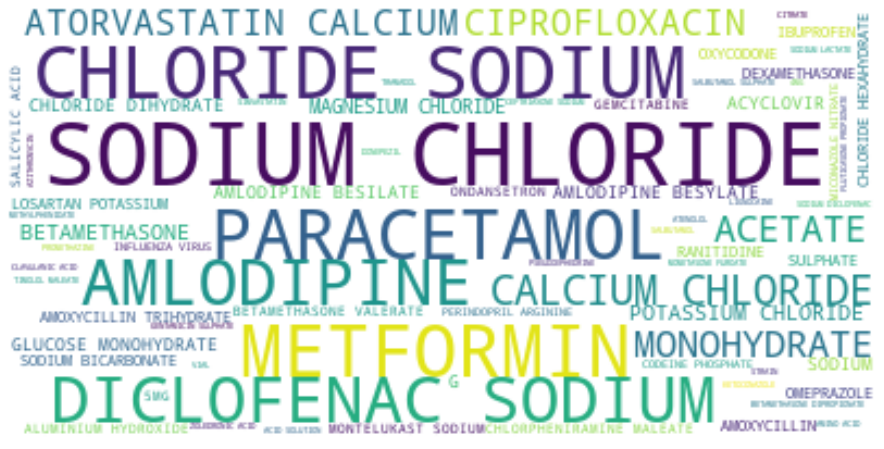

In [46]:
text = " ".join(name.upper() for name in df.active_ingredients)
#Adding words that convey litte information in describing the active ingredients to stopwords
stopwords = set(STOPWORDS)
stopwords.update(["EQV","EQUIVALENT","MG",'ML',"BASE",'HCL','HYDROCHLORIDE',"ANHYDROUS","MICRONIZED","COMPARTMENT"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
ai_count=df[ai_num].stack().value_counts().rename_axis('Active_Ingredients').to_frame('Count')
ai_count.head(10)

,Count
Active_Ingredients,
PARACETAMOL,108
SODIUM CHLORIDE,101
DICLOFENAC SODIUM,63
HYDROCHLOROTHIAZIDE,53
POTASSIUM CHLORIDE,50
ACYCLOVIR,43
PSEUDOEPHEDRINE HCL,38
PREGABALIN,38
SALICYLIC ACID,31


**Comments**
- Most common active ingredients for registered TP are NSAIDS (paracetamol, Diclofenac,ibuprofen), electrolytes (Sodium Chloride,potassium chloride) and anti-diabetic agents such as metformin

In [75]:
ai_count.tail(10)

,Count
Active_Ingredients,
CASPOFUNGIN ACETATE 55.52MG/ VIAL EQV. CASPOFUNGIN,1
DESMOPRESSIN ACETATE EQV 0.178 MG DESMOPRESSIN FREE BASE,1
ROCURONIUM 8.69 MG EQUIVALENT TO ROCURONIUM BROMIDE,1
LITHIUM CARBONATE,1
ATORVASTATIN CALCIUM 82.72MG EQUIVALENT TO ATORVASTATIN,1
CARBIDOPA MONOHYDRATE 54.1MG CORRESPONDS TO CARBIDOPA,1
EVEROLIMUS +0.2% BHT,1
IMMUNOGLOBULIN (HUMAN) (NORMAL),1
AVELUMAB,1


**Comment**
- The active ingredients may contains the salt-related information of the active ingredients thus the value_counts approach may not be appropriate as the active ingredient is not "standardized"

In [77]:
# extract just the first word in the active ingredient and value_counts
ai_count_2=df[ai_num].stack().str.split(' ').str[0].value_counts().rename_axis('Active_Ingredients').to_frame('Count')
pd.set_option('display.max_rows', None)
ai_count_2[ai_count_2["Count"]==1]

,Count
Active_Ingredients,
STREPTOMYCIN,1
URSODEOXYCHOLIC,1
CLADRIBINE,1
CINCHOCAINE,1
OBINUTUZUMAB,1
MEPOLIZUMAB,1
INDINAVIR,1
DOXYLAMINE,1
COCOA,1


**Comments**
- Generics Companies/Distributor companies may find the above list useful to look into for proposed generics which has only one registered TP

## Exploring the data for country of manufacture

In [20]:
manfr_count=df[countries_num].stack().value_counts().rename_axis('Country').to_frame('Count')
manfr_count.head()

,Count
Country,
GERMANY,721
INDIA,509
MALAYSIA,508
SINGAPORE,471
UNITED STATES,417


In [21]:
#Finding the top 10 drug product manufacturer(s)
top_10=manfr_count[:10].copy()
top_10

#Collating other drug product manufacturer(s) as others
new_row = pd.DataFrame(data = {'Count' : [manfr_count['Count'][11:].sum()]},index=["Others"])
new_row

#combining the dataframe for top10 with others
manfr_count = pd.concat([top_10, new_row])
manfr_count

,Count
GERMANY,721
INDIA,509
MALAYSIA,508
SINGAPORE,471
UNITED STATES,417
FRANCE,412
ITALY,318
SWITZERLAND,274
CANADA,263
UNITED KINGDOM,256


<AxesSubplot:>

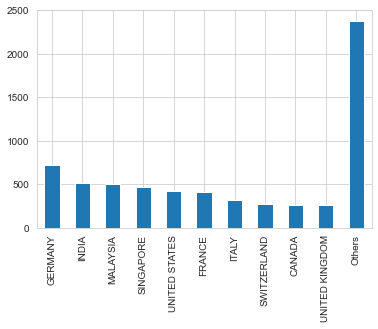

In [22]:
manfr_count['Count'].plot(kind='bar')

**Comment**
- Germany is the top drug product manufacturer for Registered TP in Singapore
- For the top 10 drug product manufacturer(s), most of them are Western countries

## Exploring the data for license holder

In [23]:
df["license_holder"].str.strip(".").str.upper().nunique()

192

In [24]:
df["product_name"].shape[0]

5621

In [25]:
license_holder_count=df["license_holder"].str.strip(".").str.upper().value_counts()


In [26]:
# Calculating for each licence holder, the proportion of registered TP that they hold
no_of_licences=df["product_name"].shape[0]
license_holder_count.map(lambda x:"{:.2f}".format(x/no_of_licences*100)+"%").head(10)

NOVARTIS (SINGAPORE) PTE LTD         5.50%
PFIZER PRIVATE LIMITED               4.20%
PHARMAFORTE SINGAPORE PTE LTD        4.13%
GOLDPLUS UNIVERSAL PTE LTD           3.72%
APEX PHARMA MARKETING PTE. LTD       3.04%
GLAXOSMITHKLINE PTE LTD              2.81%
DRUG HOUSES OF AUSTRALIA PTE. LTD    2.72%
SANOFI-AVENTIS SINGAPORE PTE. LTD    2.58%
MSD PHARMA (SINGAPORE) PTE. LTD      2.49%
DCH AURIGA SINGAPORE                 2.37%
Name: license_holder, dtype: object

**Comment**
- There are 192 unique licence holder(s) of registered TP in this dataset
- There are 5621 registered TP in this dataset
- Novartis holds the highest proportion of registered TP in Singapore (i.e. 5.5% of registered TP in Singapore
- For the top 10 licence holders, half of them are pharmaceutical distribution companies (i.e. PHARMAFORTE, GOLDPLUS, APEX PHARMA) while half are Big Pharma companies (NOVARTIS,PFIZER,GLAXOSMITHKLINE)

## Exploring the data for approval date

In [27]:
# Creating a new column "year" from approval_date
df["approval_date"]=pd.to_datetime(df["approval_date"])
df['approv_yr'] = df["approval_date"].dt.year
df

,licence_no,product_name,license_holder,approval_date,forensic_classification,atc_code,dosage_form,route_of_administration,manufacturer,country_of_manufacturer,...,ai_20,ai_21,ai_22,ai_23,ai_24,ai_25,ai_26,ai_27,ai_28,approv_yr
0,SIN03850P,OBSTETRIC CARE LOTION 1% w/w,APEX PHARMA MARKETING PTE. LTD.,1990-12-02,General Sale List,D08AC02,LOTION,TOPICAL,ORION LABORATORIES PTY LTD,AUSTRALIA,...,None,None,None,None,None,None,None,None,None,1990
1,SIN03983P,URECARE CREAM 10% w/w,APEX PHARMA MARKETING PTE. LTD.,1990-12-03,General Sale List,D02AE01,CREAM,TOPICAL,ORION LABORATORIES PTY LTD,AUSTRALIA,...,None,None,None,None,None,None,None,None,None,1990
2,SIN10823P,LEVOPRONT SYRUP 60 mg/10 ml,EMERGING PHARMA (S) PTE LTD,1999-03-24,Pharmacy Only,R05DB27,SYRUP,ORAL,Dompe pha.r.ma spa,ITALY,...,None,None,None,None,None,None,None,None,None,1999
3,SIN06713P,ZAVEDOS FOR INJECTION 10 mg/vial,PFIZER PRIVATE LIMITED,1991-09-12,Prescription Only,L01DB06,"INJECTION, POWDER, FOR SOLUTION",INTRAVENOUS,Actavis Italy S.p.A.,ITALY,...,None,None,None,None,None,None,None,None,None,1991
4,SIN06712P,ZAVEDOS FOR INJECTION 5 mg/vial,PFIZER PRIVATE LIMITED,1991-09-12,Prescription Only,L01DB06,"INJECTION, POWDER, FOR SOLUTION",INTRAVENOUS,Actavis Italy S.p.A.,ITALY,...,None,None,None,None,None,None,None,None,None,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,SIN15509P,BELKYRA INJECTION 10 MG/ML,ALLERGAN SINGAPORE PTE. LTD.,2018-06-21,Prescription Only,D11AX24,"INJECTION, SOLUTION",SUBCUTANEOUS,"Hospira, Inc.",UNITED STATES,...,None,None,None,None,None,None,None,None,None,2018
5617,SIN14202P,Botox? Powder for Solution for Injection 50 Un...,ALLERGAN SINGAPORE PTE. LTD.,2012-07-27,Prescription Only,M03AX01,"INJECTION, POWDER, FOR SOLUTION",SUBCUTANEOUS&&INTRAMUSCULAR&&INTRADERMAL,Allergan Pharmaceuticals Ireland,IRELAND,...,None,None,None,None,None,None,None,None,None,2012
5618,SIN08205P,BOTOX POWDER FOR SOLUTION FOR INJECTION 100 Un...,ALLERGAN SINGAPORE PTE. LTD.,1995-10-06,Prescription Only,M03AX01,"INJECTION, POWDER, FOR SOLUTION",INTRAMUSCULAR&&INTRADERMAL,ALLERGAN PHARMACEUTICALS IRELAND (BOTOX FACILITY),IRELAND,...,None,None,None,None,None,None,None,None,None,1995
5619,SIN01122P,STUGERON TABLET 25 mg,JOHNSON & JOHNSON PTE. LTD.,1988-05-13,Pharmacy Only,N07CA02,TABLET,ORAL,JANSSEN CILAG S P A,ITALY,...,None,None,None,None,None,None,None,None,None,1988


In [28]:
year_approved_count=df['approv_yr'].value_counts().rename_axis('year').to_frame('counts')
year_approved_count.reset_index(level=0, inplace=True)
year_approved_count.sort_values(by="year", inplace=True)
year_approved_count.head()

,year,counts
32,1987,2
2,1988,298
6,1989,240
3,1990,275
1,1991,344


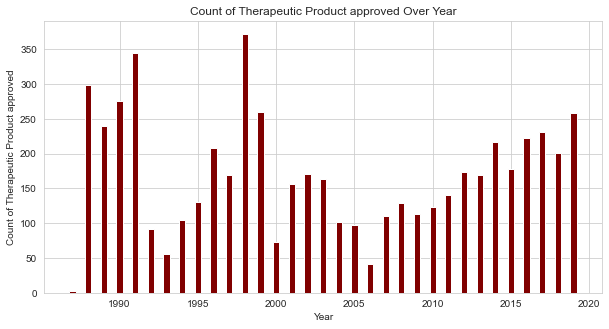

In [29]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(year_approved_count["year"],year_approved_count["counts"], color ='maroon', width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Count of Therapeutic Product approved")
plt.title("Count of Therapeutic Product approved Over Year")
plt.show()



**Comment**
- Among all the registered Therapeutic Products contained in this dataset, most of them are approved in Year 1998
- There seems to a downward trend of approval of registered TP from 1998 to 2006. This may warrant some investigation. Perhaps new regulatory requirements may be introduced by HSA during this period that may reduce the number of TP being registered.